🔹 1. Distribución de Nacionalidades de los Pilotos
📌 Objetivo: Crear un gráfico de barras con el número de pilotos por nacionalidad.
🔹 Librerías: pandas, matplotlib, seaborn
🔹 Tipo de gráfico: Barras

In [79]:
import pandas as pd   # Para cargar y manipular los datasets
import numpy as np    # Para operaciones numéricas


In [80]:
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para gráficos más avanzados y estéticos


In [95]:
drivers = pd.read_csv("drivers.csv", index_col=None)
fastest_laps = pd.read_csv("fastest_laps_.csv")
teams = pd.read_csv("teams.csv")
winners = pd.read_csv("winners.csv")

In [82]:
drivers.head()

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950,ASC


In [83]:
teams['Team'].unique()

array(['Vanwall', 'Ferrari', 'Cooper Climax', 'BRM', 'Maserati',
       'Lotus Climax', 'Cooper Maserati', 'Cooper Castellotti', 'Porsche',
       'BRM Climax', 'Lola Climax', 'Brabham Climax', 'Lotus BRM',
       'BRP BRM', 'Brabham BRM', 'Honda', 'Brabham Repco', 'Eagle Climax',
       'McLaren Ford', 'McLaren Serenissima', 'Lotus Ford',
       'Eagle Weslake', 'McLaren BRM', 'Matra Ford', 'Cooper BRM',
       'Matra', 'Mclaren BRM', 'Brabham Ford', 'March Ford',
       'Surtees Ford', 'Tyrrell Ford', 'Shadow Ford', 'Iso Marlboro Ford',
       'Tecno', 'Hesketh Ford', 'Lola Ford',
       'Frank Williams Racing Cars/Williams', 'Parnelli Ford',
       'Hill Ford', 'Penske Ford', 'Ensign Ford', 'Ligier Matra',
       'Brabham Alfa Romeo', 'Fittipaldi Ford', 'Wolf Ford',
       'Williams Ford', 'Arrows Ford', 'Renault', 'Ligier Ford',
       'ATS Ford', 'Alfa Romeo', 'Theodore Ford', 'Brabham BMW',
       'Osella Ford', 'Lotus Renault', 'Toleman Hart', 'Williams Honda',
       'McLaren T

In [84]:
drivers['Car'].unique()

array(['Alfa Romeo', 'Talbot-Lago', 'Ferrari', 'Kurtis Kraft Offenhauser',
       'Deidt Offenhauser', 'Maserati', 'Simca-Gordini', nan,
       'Maserati Milano', 'BRM', 'Sherman Offenhauser',
       'Schroeder Offenhauser', 'Cooper Bristol', 'Gordini',
       'Kuzma Offenhauser', 'Lesovsky Offenhauser',
       'Connaught Lea Francis', 'Mercedes-Benz', 'Lancia',
       'Watson Offenhauser', 'Connaught Alta', 'Phillips Offenhauser',
       'Vanwall', 'Kurtis Kraft Novi', 'Epperly Offenhauser',
       'Cooper Climax', 'Lotus Climax', 'Cooper Maserati',
       'Cooper Castellotti', 'Trevis Offenhauser', 'Porsche',
       'BRM Climax', 'Lola Climax', 'Brabham Climax', 'Lotus BRM',
       'BRP BRM', 'Scirocco BRM', 'ATS', 'Gilby BRM', 'Stebro Ford',
       'LDS Alfa Romeo', 'Lotus Ford', 'Brabham Ford', 'Brabham BRM',
       'Honda', 'Brabham Repco', 'Eagle Climax', 'Eagle Weslake',
       'McLaren Ford', 'McLaren BRM', 'Matra Ford', 'Matra', 'Cooper BRM',
       'Tyrrell Ford', 'March Ford

In [96]:

# Diccionario de equipos (ajustado para incluir más variaciones)
equipos_normalizados = {
    "McLaren": ["McLaren", "McLaren Ford", "McLaren BRM", "McLaren TAG", "McLaren Honda", "McLaren Mercedes", "McLaren Renault", "McLaren Peugeot"],
    "Ferrari": ["Ferrari", "Minardi Ferrari", "Dallara Ferrari", "Sauber Ferrari", "Alfa Romeo Ferrari", "Kick Sauber Ferrari"],
    "Red Bull": ["Red Bull", "RBR Cosworth", "Red Bull Renault", "RBR Ferrari", "Red Bull Racing Renault", "Red Bull Racing TAG Heuer", "Red Bull Racing Honda", "Red Bull Racing RBPT", "Red Bull Racing Honda RBPT"],
    "Williams": ["Williams", "Williams Ford", "Williams Honda", "Williams Renault", "Williams BMW", "Williams Cosworth", "Williams Toyota", "Williams Mecachrome", "Williams Supertec", "Williams Mercedes"],
    "Alfa Romeo": ["Alfa Romeo", "Sauber", "Sauber Mercedes", "Sauber Petronas", "Sauber BMW", "Alfa Romeo Racing Ferrari", "Kick Sauber Ferrari"],
    "Mercedes": ["Mercedes", "Brawn Mercedes"],
    "Aston Martin": ["Aston Martin Mercedes", "Aston Martin Aramco Mercedes"],
    "AlphaTauri": ["AlphaTauri Honda", "AlphaTauri RBPT", "AlphaTauri Honda RBPT"],
    "Benetton": ["Benetton BMW", "Benetton Ford", "Benetton Renault", "Benetton Playlife"],
    "Force India": ["Force India Ferrari", "Force India Mercedes", "Force India Sahara"],
    "Lotus": ["Lotus Climax", "Lotus BRM", "Lotus Ford", "Lotus Honda", "Lotus Judd", "Lotus Lamborghini", "Lotus Cosworth", "Lotus Mercedes"],
    "Minardi": ["Minardi Ford", "Minardi Ferrari", "Minardi Lamborghini", "Minardi Asiatech", "Minardi Cosworth"],
    "Toyota": ["Toyota", "Jordan Toyota", "MF1 Toyota"],
    "Jaguar": ["Jaguar Cosworth"],
    "Prost": ["Prost Mugen Honda", "Prost Peugeot", "Prost Acer"],
    "Haas": ["Haas Ferrari"],
    "Caterham": ["Caterham Renault"],
    "Virgin": ["Virgin Cosworth", "Marussia Cosworth", "Marussia Ferrari"],
    "HRT": ["HRT Cosworth"],
    "Spyker": ["Spyker Ferrari"],
    "Alpine": ["Alpine Renault"],
    "Toro Rosso": ["Toro Rosso", "Toro Rosso Ferrari", "Scuderia Toro Rosso Honda"],
    "Super Aguri": ["Super Aguri Honda"],
    "Racing Point": ["Racing Point BWT Mercedes"],
    "RB": ["RB Honda RBPT"],
}



def normalizar_equipo(nombre):
    if pd.isna(nombre):
        return None
    
    nombre = nombre.strip().lower()  # Convertimos a minúsculas y eliminamos espacios extra

    for nombre_normalizado, variantes in equipos_normalizados.items():
        if nombre in [v.lower() for v in variantes]:  # Comparación exacta
            return nombre_normalizado

    return nombre.title()  # Si no hay coincidencia exacta, devuelve el formato título
# Aplicamos la función a los DataFrames
teams['Team'] = teams['Team'].map(normalizar_equipo)
drivers['Car'] = drivers['Car'].map(normalizar_equipo)

# Verificación de valores únicos después de la unificación
print(teams['Team'].unique())
print(drivers['Car'].unique())


['Vanwall' 'Ferrari' 'Cooper Climax' 'Brm' 'Maserati' 'Lotus'
 'Cooper Maserati' 'Cooper Castellotti' 'Porsche' 'Brm Climax'
 'Lola Climax' 'Brabham Climax' 'Brp Brm' 'Brabham Brm' 'Honda'
 'Brabham Repco' 'Eagle Climax' 'McLaren' 'Mclaren Serenissima'
 'Eagle Weslake' 'Matra Ford' 'Cooper Brm' 'Matra' 'Brabham Ford'
 'March Ford' 'Surtees Ford' 'Tyrrell Ford' 'Shadow Ford'
 'Iso Marlboro Ford' 'Tecno' 'Hesketh Ford' 'Lola Ford'
 'Frank Williams Racing Cars/Williams' 'Parnelli Ford' 'Hill Ford'
 'Penske Ford' 'Ensign Ford' 'Ligier Matra' 'Brabham Alfa Romeo'
 'Fittipaldi Ford' 'Wolf Ford' 'Williams' 'Arrows Ford' 'Renault'
 'Ligier Ford' 'Ats Ford' 'Alfa Romeo' 'Theodore Ford' 'Brabham Bmw'
 'Osella Ford' 'Lotus Renault' 'Toleman Hart' 'Arrows Bmw'
 'Ligier Renault' 'Osella Alfa Romeo' 'Tyrrell Renault' 'Benetton'
 'Arrows Megatron' 'Zakspeed' 'Ligier Megatron' 'Ags Ford' 'March Judd'
 'Williams Judd' 'Rial Ford' 'Minardi' 'Dallara Ford' 'Brabham Judd'
 'Onyx Ford' 'Lola Lamborghini' '

In [97]:
drivers.to_csv('drivers_updated.csv', index= False)
teams.to_csv('teams_updated.csv', index = False)

In [87]:
drivers.head()

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,McLaren,30.0,1950,FAR
1,2,Juan Manuel Fangio,ARG,McLaren,27.0,1950,FAN
2,3,Luigi Fagioli,ITA,McLaren,24.0,1950,FAG
3,4,Louis Rosier,FRA,McLaren,13.0,1950,ROS
4,5,Alberto Ascari,ITA,McLaren,11.0,1950,ASC


In [88]:
len(drivers['Car'].unique())

2

In [89]:
drivers_per_country = drivers['Nationality'].value_counts()
print(drivers_per_country)

GBR    299
ITA    193
FRA    185
GER    137
USA    135
BRA    111
FIN     65
ESP     51
AUS     51
AUT     44
NZL     38
BEL     36
ARG     35
JPN     35
SWE     33
SUI     31
MEX     30
CAN     27
NED     27
RSA     16
DEN     11
RUS     10
MON      9
POL      7
THA      7
VEN      6
COL      6
IND      5
POR      4
IRL      4
RHO      3
CHN      3
HUN      2
CHI      2
MAS      1
INA      1
RAF      1
Name: Nationality, dtype: int64


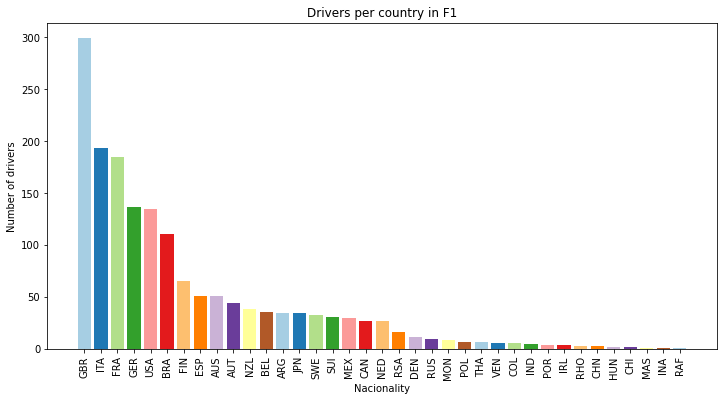

In [90]:
colors = plt.cm.Paired.colors
plt.figure(figsize=(12,6))
plt.bar(drivers_per_country.index, drivers_per_country.values, color = colors)
plt.xticks(rotation = 90)
plt.xlabel("Nacionality")
plt.ylabel("Number of drivers")
plt.title("Drivers per country in F1")
plt.show()

Reviamos los datos que contiene el DF
  Pos                Driver Nationality      Car   PTS  year Code
0   1         Nino  Farina          ITA  McLaren  30.0  1950  FAR
1   2  Juan Manuel  Fangio          ARG  McLaren  27.0  1950  FAN
2   3       Luigi  Fagioli          ITA  McLaren  24.0  1950  FAG
3   4         Louis Rosier          FRA  McLaren  13.0  1950  ROS
4   5      Alberto  Ascari          ITA  McLaren  11.0  1950  ASC
Agrupamos los pilotos por año:
year
1950    22
1951    19
1952    22
1953    19
1954    26
        ..
2020    23
2021    21
2022    22
2023    22
2024    21
Name: Driver, Length: 75, dtype: int64


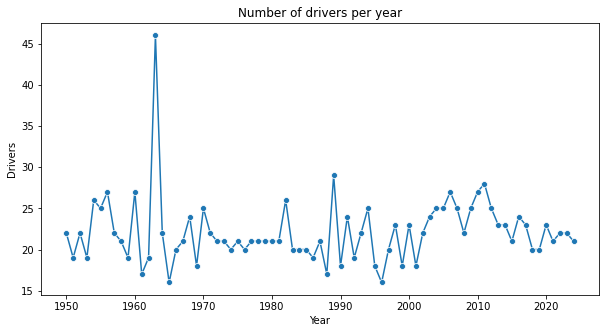

In [91]:
#Explorar los datos
print("Reviamos los datos que contiene el DF")
print(drivers.head())

# Agrupar pilotos por año 
drivers_per_year = drivers.groupby("year")["Driver"].nunique()
print ("Agrupamos los pilotos por año:")
print(drivers_per_year)

#Crear gráfico:
plt.figure(figsize=(10,5))
sns.lineplot(x = drivers_per_year.index, y = drivers_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel("Drivers")
plt.title("Number of drivers per year")

plt.show()


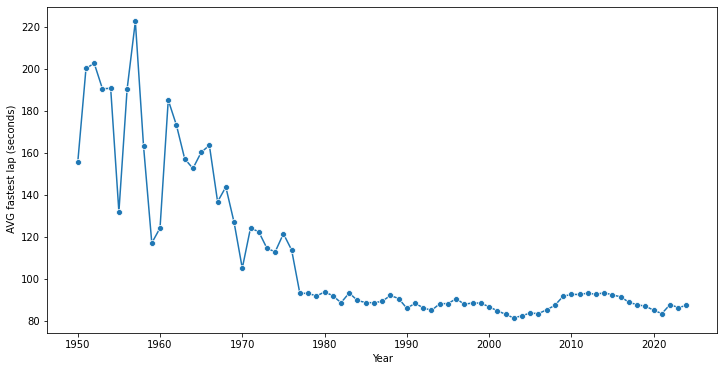

In [92]:
fastest_laps = fastest_laps.dropna(subset=["Time"])
fastest_laps["Time"] = "00:" + fastest_laps["Time"]  # Asegurar formato hh:mm:ss.sss
fastest_laps["Time"] = pd.to_timedelta(fastest_laps["Time"], errors="coerce")
fastest_laps["Time"] = fastest_laps["Time"].dt.total_seconds()

fastest_laps_per_year = fastest_laps.groupby('year')["Time"].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x = fastest_laps_per_year.index, y= fastest_laps_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel(" AVG fastest lap (seconds)")
plt.show()









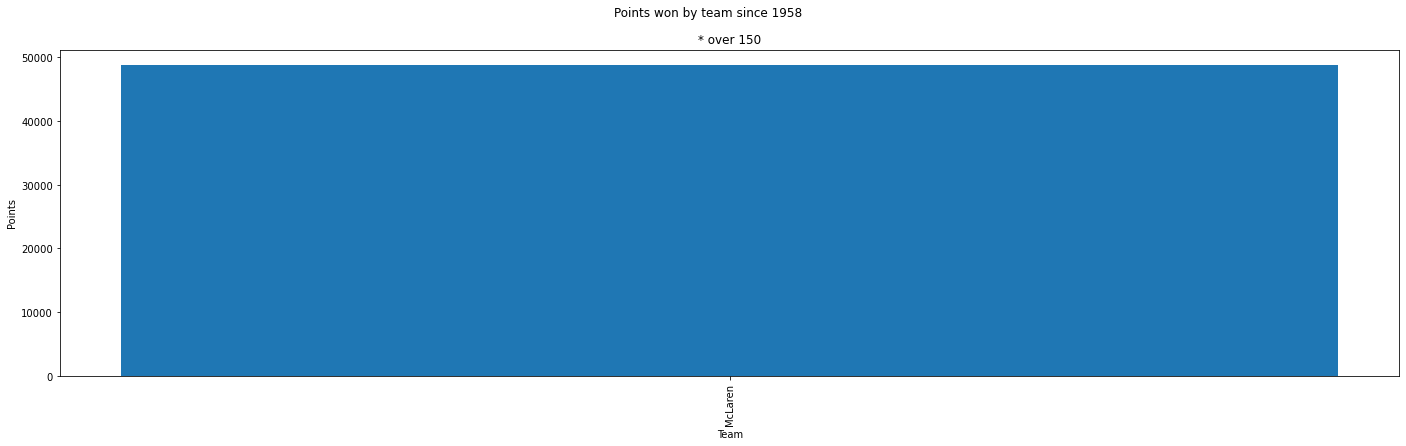

In [93]:
teams_points_year = teams.groupby('Team')["PTS"].sum()
teams_points_year = teams_points_year[teams_points_year > 150]
teams_points_year = teams_points_year.sort_values(ascending=False)


plt.figure(figsize= (24, 6))
plt.bar(x = teams_points_year.index, height = teams_points_year.values)
plt.xticks(rotation=90)
plt.suptitle("Points won by team since 1958")
plt.title("* over 150")
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

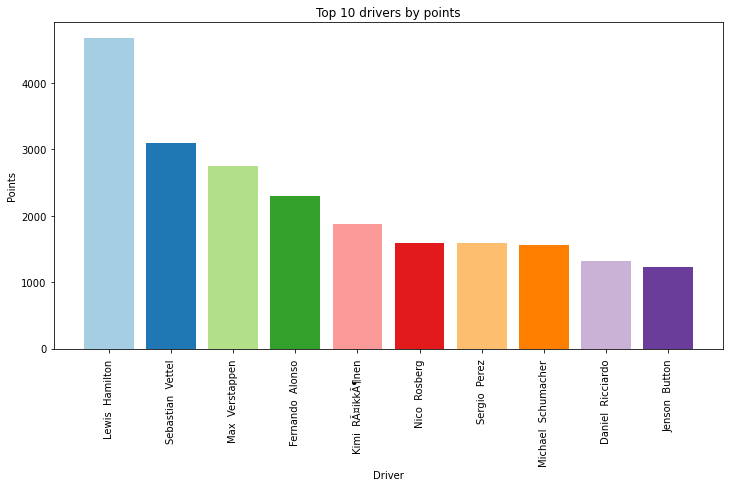

In [94]:
drivers.head()

drivers_points = drivers.groupby("Driver")["PTS"].sum()
drivers_points = drivers_points.sort_values(ascending = False).head(10)


plt.figure(figsize= (12, 6))
plt.bar(x = drivers_points.index, height = drivers_points.values, color = colors)
plt.xticks(rotation=90)
plt.title("Top 10 drivers by points")
plt.xlabel("Driver")
plt.ylabel("Points")
plt.show()
